In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from moviepy.editor import VideoFileClip

In [2]:
## HOG と DT （学習データと検証データは異なる）##

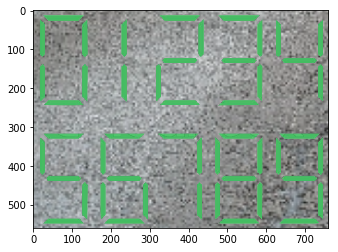

In [3]:
im=cv2.imread('imgs/original.png')
plt.imshow(im)

In [4]:
im = np.logical_and(im[:,:,1]>170, im[:,:,0]<100)
im = im.astype(np.uint8)*255

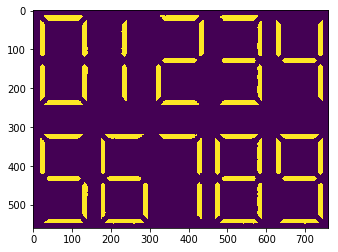

In [5]:
plt.imshow(im)
size = im.shape

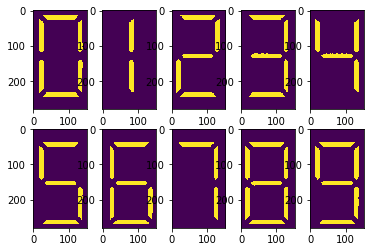

In [6]:
row = size[0]/2
# col = size[0]/4+10
col = size[1]/5
count = 1
plt.figure
im_train = []
for j in range(1,3):
    for i in range(1,6):
        im_clp = im[row*(j-1):row*j, col*(i-1):col*i]
        cv2.imwrite('imgs/'+str(count)+'.png', im_clp)
        plt.subplot(2,5,count)
        plt.imshow(im_clp)
        count += 1
        im_train.append(im_clp)

(280, 152)

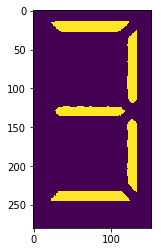

In [7]:
plt.imshow(im_train[3])
size = im_train[5].shape
size

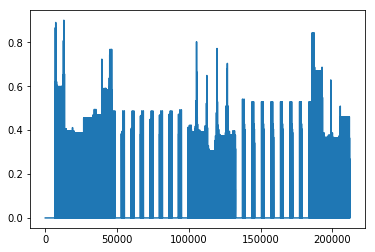

In [8]:
winSize = (64,32)
blockSize = (16*2,16*2)
blockStride = (8*2,8*2)
cellSize = (4,8)
nbins = 3
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog_extractor = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
hog = hog_extractor.compute(im_train[5].astype(np.uint8))
plt.plot(hog)

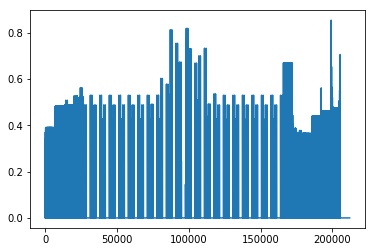

In [9]:
hog = hog_extractor.compute(im_train[0].astype(np.uint8))
plt.plot(hog)

In [10]:
feature_HOG = []
label = []
for i in range(0,10):
    hog = hog_extractor.compute(im_train[i].astype(np.uint8))
    hog = hog.reshape(len(hog))
    feature_HOG.append(hog)
    label.append(i)

In [11]:
feature_HOG[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [12]:
[len(v) for v in feature_HOG]

[211968,
 211968,
 211968,
 211968,
 211968,
 211968,
 211968,
 211968,
 211968,
 211968]

In [13]:
label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
# 学習
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(feature_HOG, label)

In [15]:
prd = clf.predict(feature_HOG)
prd

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

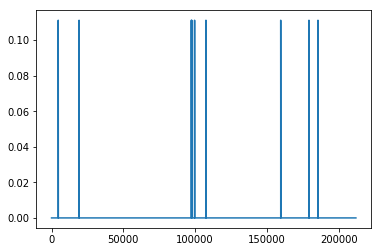

In [16]:
importances = clf.feature_importances_
plt.plot(importances)

In [17]:
# RFもやってみる

In [18]:
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(feature_HOG, label)

In [19]:
pred = clf.predict(feature_HOG)
fpr, tpr, thresholds = roc_curve(label, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, label)

1.0

In [20]:
importances = clf.feature_importances_
indices = np.argsort(importances)

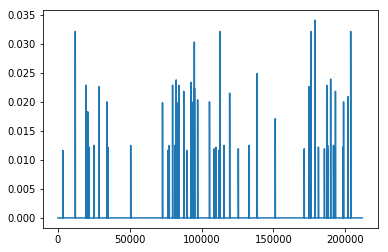

In [21]:
plt.plot(importances)

('Save', 'imgs/train/0000.png')
('Save', 'imgs/train/0001.png')
('Save', 'imgs/train/0002.png')
('Save', 'imgs/train/0003.png')
('Save', 'imgs/train/0004.png')
('Save', 'imgs/train/0005.png')
('Save', 'imgs/train/0006.png')
('Save', 'imgs/train/0007.png')
('Save', 'imgs/train/0008.png')
('Save', 'imgs/train/0009.png')
('Save', 'imgs/train/0010.png')
('Save', 'imgs/train/0011.png')
('Save', 'imgs/train/0012.png')
('Save', 'imgs/train/0013.png')
('Save', 'imgs/train/0014.png')
('Save', 'imgs/train/0015.png')
('Save', 'imgs/train/0016.png')
('Save', 'imgs/train/0017.png')
('Save', 'imgs/train/0018.png')
('Save', 'imgs/train/0019.png')
('Save', 'imgs/train/0020.png')
('Save', 'imgs/train/0021.png')
('Save', 'imgs/train/0022.png')
('Save', 'imgs/train/0023.png')
('Save', 'imgs/train/0024.png')
('Save', 'imgs/train/0025.png')
('Save', 'imgs/train/0026.png')
('Save', 'imgs/train/0027.png')
('Save', 'imgs/train/0028.png')
('Save', 'imgs/train/0029.png')
('Save', 'imgs/train/0030.png')
('Save',

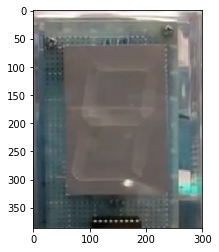

In [22]:
videopath='imgs/test.mov'
image_dir='imgs/train/'
i = 0
cap = cv2.VideoCapture(videopath)
while(cap.isOpened()):
    flag, frame = cap.read()  # Capture frame-by-frame
    if flag == False:  # Is a frame left?
        break
    frame_clp = cv2.resize(frame[90:310,70:220,:],(size[1],size[0]))
    frame_clp = np.logical_and(frame_clp[:,:,1]>150, frame_clp[:,:,0]<100)
    frame_clp = frame_clp.astype(np.uint8)*255
    cv2.imwrite(image_dir  + str(i).zfill(4) + '.png', frame_clp)  # Save a frame
    print('Save', image_dir + str(i).zfill(4) + '.png')
    i += 1
    plt.imshow(frame)

cap.release()  # When everything done, release the capture

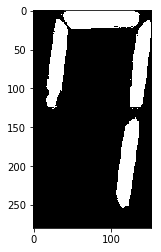

In [23]:
frame = cv2.imread('imgs/train/0180.png')
#frame_clp = cv2.resize(frame[90:310,70:220,:],(size[1],size[0]))
#frame_clp = np.logical_and(frame_clp[:,:,1]>150, frame_clp[:,:,0]<100)
#frame_clp = frame_clp.astype(np.uint8)*255
frame_clp = frame
plt.imshow(frame_clp)

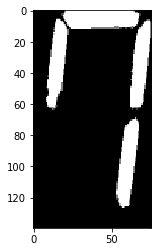

In [24]:
clp_size = frame_clp.shape
frame_clp_half = cv2.resize(frame_clp,dsize=(clp_size[1]/2, clp_size[0]/2))
plt.imshow(frame_clp_half)

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

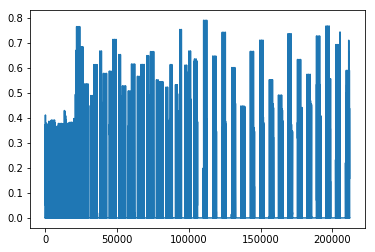

In [25]:
hog = hog_extractor.compute(frame_clp.astype(np.uint8))
hog = hog.reshape(len(hog))
plt.plot(hog)
hog

In [26]:
pred = clf.predict(hog.reshape(1, -1))
pred

array([7])

In [27]:
videopath='imgs/test.mov'
image_dir='imgs/train/'
prd = []
cap = cv2.VideoCapture(videopath)
while(cap.isOpened()):
    flag, frame = cap.read()  # Capture frame-by-frame
    if flag == False:  # Is a frame left?
        break
    frame = cv2.resize(frame[90:310,70:220,:],(size[1],size[0]))
    frame_ = np.logical_and(frame[:,:,1]>150, frame[:,:,0]<100)
    frame_ = frame_.astype(np.int)*255
    hog = hog_extractor.compute(frame_.astype(np.uint8))
    hog = hog.reshape(len(hog))
    prd.append( clf.predict(hog.reshape(1, -1)) )
cap.release()  # When everything done, release the capture

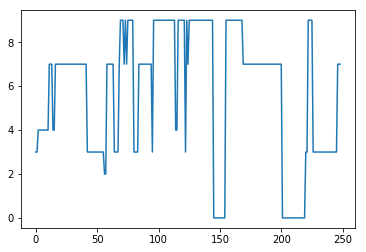

In [28]:
plt.plot(prd)

In [29]:
################################
## HOG で k-mean してラベリング -> RF ##
################################

In [30]:
feature = []
for j in range(0,i):
    frame = cv2.imread(image_dir + str(j).zfill(4) + '.png')
    hog = hog_extractor.compute(frame.astype(np.uint8))
    hog = hog.reshape(len(hog))
    feature.append(hog)

In [31]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=9).fit_predict(feature)
clusters

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2], dtype=int32)

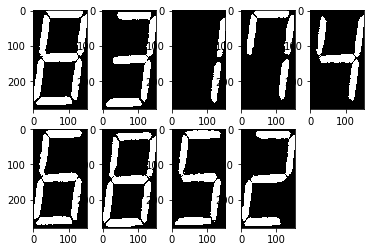

In [32]:
for cluster in range(0,9):
    plt.subplot(2,5,cluster+1)
    indx = np.where(clusters==cluster)
    plt.imshow(cv2.imread(image_dir + str(indx[0][3]).zfill(4) + '.png'))

In [33]:
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(feature, clusters)

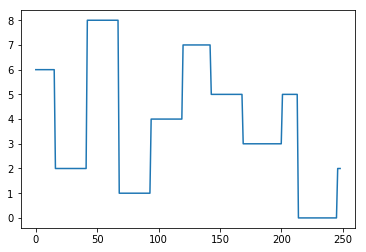

In [34]:
videopath='imgs/test.mov'
image_dir='imgs/train/'
prd = []
cap = cv2.VideoCapture(videopath)
while(cap.isOpened()):
    flag, frame = cap.read()  # Capture frame-by-frame
    if flag == False:  # Is a frame left?
        break
    frame = cv2.resize(frame[90:310,70:220,:],(size[1],size[0]))
    frame_ = np.logical_and(frame[:,:,1]>150, frame[:,:,0]<100)
    frame_ = frame_.astype(np.int)*255
    hog = hog_extractor.compute(frame_.astype(np.uint8))
    hog = hog.reshape(len(hog))
    prd.append( clf.predict(hog.reshape(1, -1)) )
cap.release()  # When everything done, release the capture
plt.plot(prd)

In [35]:
##############
## 領域 で 認識 ##
##############

In [36]:
DIGITS_LOOKUP = {
    (1, 1, 1, 0, 1, 1, 1): 0,
    (0, 0, 1, 0, 0, 1, 0): 1,
    (1, 0, 1, 1, 1, 0, 1): 2,
    (1, 0, 1, 1, 0, 1, 1): 3,
    (0, 1, 1, 1, 0, 1, 0): 4,
    (1, 1, 0, 1, 0, 1, 1): 5,
    (1, 1, 0, 1, 1, 1, 1): 6,
    (1, 1, 1, 0, 0, 1, 0): 7,
    (1, 1, 1, 1, 1, 1, 1): 8,
    (1, 1, 1, 1, 0, 1, 1): 9
}

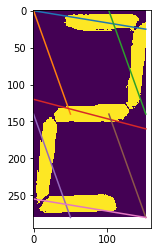

In [37]:
img = cv2.imread('imgs/train/0064.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img)

w = size[1]
h  = size[0]
dW = 50
dH = 25
dHC = 20

segments = [
    ((0, 0), (w, dH)),	# top
    ((0, 0), (dW, h // 2)),	# top-left
    ((w - dW, 0), (w, h // 2)),	# top-right
    ((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
    ((0, h // 2), (dW, h)),	# bottom-left
    ((w - dW, h // 2), (w, h)),	# bottom-right
    ((0, h - dH), (w, h))	# bottom
]

on = [0] * len(segments)

for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
    segROI = img[yA:yB, xA:xB]
    total = cv2.countNonZero(segROI)
    area = (xB - xA) * (yB - yA)
    plt.plot((xA, xB), (yA, yB))

    if total / float(area) > 0.2:
        on[i]= 1

try:
    digit = DIGITS_LOOKUP[tuple(on)]
except:
    digit = -1

In [38]:
print(digit)
print(on)

2
[1, 0, 1, 1, 1, 0, 1]


In [39]:
def get_digit(img):
    w = size[1]
    h  = size[0]
    dW = 50
    dH = 25
    dHC = 20

    segments = [
        ((0, 0), (w, dH)),	# top
        ((0, 0), (dW, h // 2)),	# top-left
        ((w - dW, 0), (w, h // 2)),	# top-right
        ((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
        ((0, h // 2), (dW, h)),	# bottom-left
        ((w - dW, h // 2), (w, h)),	# bottom-right
        ((0, h - dH), (w, h))	# bottom
    ]

    on = [0] * len(segments)

    for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
        segROI = img[yA:yB, xA:xB]
        total = cv2.countNonZero(segROI)
        area = (xB - xA) * (yB - yA)

        if total / float(area) > 0.2:
            on[i]= 1

    try:
        digit = DIGITS_LOOKUP[tuple(on)]
    except:
        digit = -1
        
    return digit

In [40]:
get_digit(img)

2

In [41]:
videopath='imgs/test.mov'
image_dir='imgs/train/'
prd = []
cap = cv2.VideoCapture(videopath)
while(cap.isOpened()):
    flag, frame = cap.read()  # Capture frame-by-frame
    if flag == False:  # Is a frame left?
        break
    frame = cv2.resize(frame[90:310,70:220,:],(size[1],size[0]))
    frame = np.logical_and(frame[:,:,1]>150, frame[:,:,0]<100)
    frame = frame.astype(np.uint8)*255
    prd.append(get_digit(frame))
cap.release()  # When everything done, release the capture

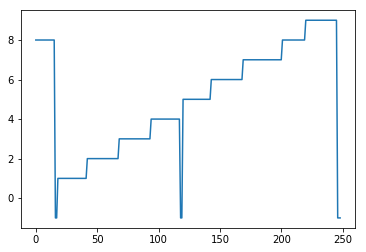

In [42]:
plt.plot(prd)

In [43]:
#######################
## Light GBM もやってみよ ##
#######################

In [44]:
import lightgbm as lgb

In [45]:
lgb_train = lgb.Dataset(np.array(feature), clusters)
lgb_eval = lgb.Dataset(np.array(feature), clusters, reference=lgb_train)

lgbm_params = {
    'objective': 'multiclass',
    'num_class': 9,
}

model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)

y_pred = model.predict(np.array(feature), num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1) 

accuracy = sum(clusters == y_pred_max) / len(clusters)
print(accuracy)

[1]	valid_0's multi_logloss: 1.74707
[2]	valid_0's multi_logloss: 1.47374
[3]	valid_0's multi_logloss: 1.2702
[4]	valid_0's multi_logloss: 1.10864
[5]	valid_0's multi_logloss: 0.975654
[6]	valid_0's multi_logloss: 0.863621
[7]	valid_0's multi_logloss: 0.767717
[8]	valid_0's multi_logloss: 0.684668
[9]	valid_0's multi_logloss: 0.612135
[10]	valid_0's multi_logloss: 0.548369
[11]	valid_0's multi_logloss: 0.492026
[12]	valid_0's multi_logloss: 0.442043
[13]	valid_0's multi_logloss: 0.397558
[14]	valid_0's multi_logloss: 0.357864
[15]	valid_0's multi_logloss: 0.32237
[16]	valid_0's multi_logloss: 0.290575
[17]	valid_0's multi_logloss: 0.262053
[18]	valid_0's multi_logloss: 0.236436
[19]	valid_0's multi_logloss: 0.213404
[20]	valid_0's multi_logloss: 0.192679
[21]	valid_0's multi_logloss: 0.174015
[22]	valid_0's multi_logloss: 0.157199
[23]	valid_0's multi_logloss: 0.142037
[24]	valid_0's multi_logloss: 0.128362
[25]	valid_0's multi_logloss: 0.116022
[26]	valid_0's multi_logloss: 0.104884
[

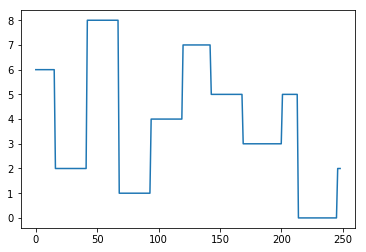

In [69]:
videopath='imgs/test.mov'
image_dir='imgs/train/'
prd = []
cap = cv2.VideoCapture(videopath)
while(cap.isOpened()):
    flag, frame = cap.read()  # Capture frame-by-frame
    if flag == False:  # Is a frame left?
        break
    frame = cv2.resize(frame[90:310,70:220,:],(size[1],size[0]))
    frame_ = np.logical_and(frame[:,:,1]>150, frame[:,:,0]<100)
    frame_ = frame_.astype(np.int)*255
    hog = hog_extractor.compute(frame_.astype(np.uint8))
    hog = hog.reshape(len(hog))
    prd.append( model.predict(hog.reshape(1, -1)).reshape(1,-1) )
cap.release()  # When everything done, release the capture

prd = np.array(prd).reshape(-1,9)
prd_max = np.argmax(prd, axis=1)
plt.plot(prd_max)